In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# fonte dos dados: https://prefeitura.pbh.gov.br/saude/coronavirus
# > BOLETIM EPIDEMIOLÓGICO E ASSISTENCIAL
df = pd.read_csv('covid-bh.csv')
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,2020-05-15,1088,NaN,NaN,29
1,2020-05-18,1189,156.0,1002.0,31
2,2020-05-19,1249,155.0,1061.0,33
3,2020-05-20,1249,NaN,NaN,35
4,2020-05-21,1316,187.0,1090.0,36
...,...,...,...,...,...
122,2020-11-10,49863,1955.0,46378.0,1530
123,2020-11-11,50106,1998.0,46575.0,1533
124,2020-11-12,50403,2082.0,46770.0,1551
125,2020-11-13,50587,2122.0,46907.0,1558


In [7]:
df.dtypes

DATA                  object
CONFIRMADOS            int64
EM ACOMPANHAMENTO    float64
RECUPERADOS          float64
ÓBITOS                 int64
dtype: object

In [8]:
df['ÓBITOS']

0        29
1        31
2        33
3        35
4        36
       ... 
122    1530
123    1533
124    1551
125    1558
126    1566
Name: ÓBITOS, Length: 127, dtype: int64

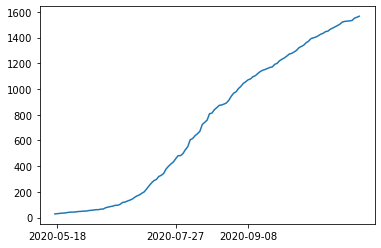

In [9]:
plt.xticks([1,50,80])
plt.plot(df['DATA'], df['ÓBITOS'])

In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,2020-05-18,1189,156.0,1002.0,31
1,2020-05-19,1249,155.0,1061.0,33
2,2020-05-21,1316,187.0,1090.0,36
3,2020-05-25,1444,275.0,1127.0,42
4,2020-05-26,1534,280.0,1211.0,43
...,...,...,...,...,...
115,2020-11-10,49863,1955.0,46378.0,1530
116,2020-11-11,50106,1998.0,46575.0,1533
117,2020-11-12,50403,2082.0,46770.0,1551
118,2020-11-13,50587,2122.0,46907.0,1558


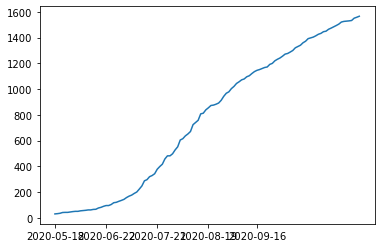

In [12]:
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], df['ÓBITOS'])

In [13]:
df['RECUPERADOSNOVOS'] = df['RECUPERADOS'].diff()
df['RECUPERADOSNOVOS'][0] = 0

<ipython-input-13-d5e2d50be54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECUPERADOSNOVOS'][0] = 0


In [14]:
df['RECUPERADOSNOVOS'][0]

0.0

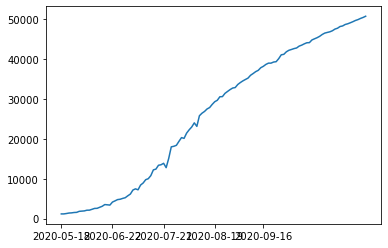

In [15]:
# if recovered means removed (recovered + dead) 
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)

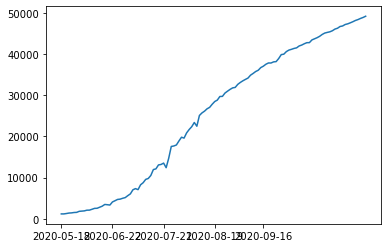

In [16]:
# if recovered really means recovered
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS'] - df['ÓBITOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)